In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline

In [4]:
data = loadmat('ex8data1.mat')
X = data['X']
X.shape

(307, 2)

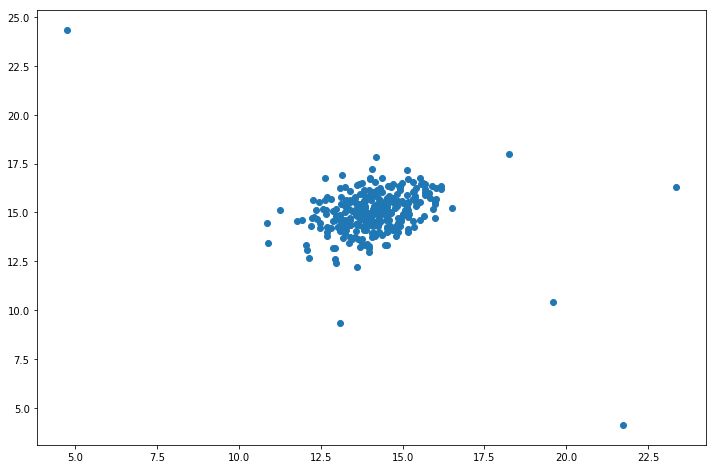

In [5]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:, 0], X[:, 1])

In [9]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [10]:
def gaussian_estimate(X):
    mu = X.mean(axis=0)
    sigma = X.var(axis=0)
    return mu, sigma

In [11]:
mu, sigma = gaussian_estimate(X)
mu, sigma

(array([14.11222578, 14.99771051]), array([1.83263141, 1.70974533]))